# **Laboratorio 5:** Transformadas de la Imagen
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)

Pasar una imagen a un dominio diferente puede facilitar algunos procesos que, de lo contrario, podrían requerir tiempos más prolongados. Esto se conoce como Transformación o Transformada de la imagen y abre un mundo de posibilidades. 


La primera transformada que veremos en este laboratorio es la Transformada de Fourier (TF), la cual nos permite transformar una imagen del dominio espacial al dominio de la frecuencia. Una TF observa los componentes de una imagen (bordes como secciones de alta frecuencia y áreas de color suave como de baja frecuencia) y traza estas frecuencias como puntos en una imagen denominada como Magnitud del Espectro.

De hecho, una TF trata los patrones de intensidad en una imagen como ondas sinusoidales con una frecuencia particular. Puede ver una visualización interesante de estos componentes de onda sinusoidal [en esta página](https://plus.maths.org/content/fourier-transforms-images).

En este laboratorio, primero veremos algunos patrones de imagen simples para construir una idea de cómo se ven los componentes de frecuencia de la imagen y luego transformaremos una imagen más compleja para verla en el dominio de la frecuencia.

Finalmente, exploraremos la transformada de Hough para la detección de las líneas existentes en una autopista.

# 1. Transformada de Fourier

## 1.1 Abrir y mostrar dos imágenes

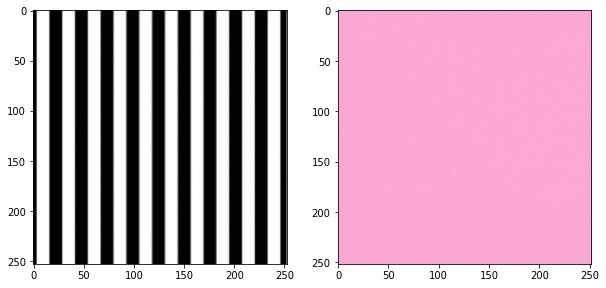

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Leer la primera imagen
image_stripes = cv2.imread('stripes.png')
# Cambiar el espacio de colores (de RGB a BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Leer la segunda imagen
image_solid = cv2.imread('pink_solid.png')
# Cambiar el espacio de colores (de RGB a BGR)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

## 1.2 Convertir las imagenes a escala de grises

In [ ]:
# Convertir las imágenes a escala de grises para centrarnos en los patrones de intensidad de la imagen
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# Normalizar los valores de color de la imagen desde un rango de [0,255] a [0,1] para su posterior procesamiento
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

## 1.3 Aplicar la Transformada de Fourier

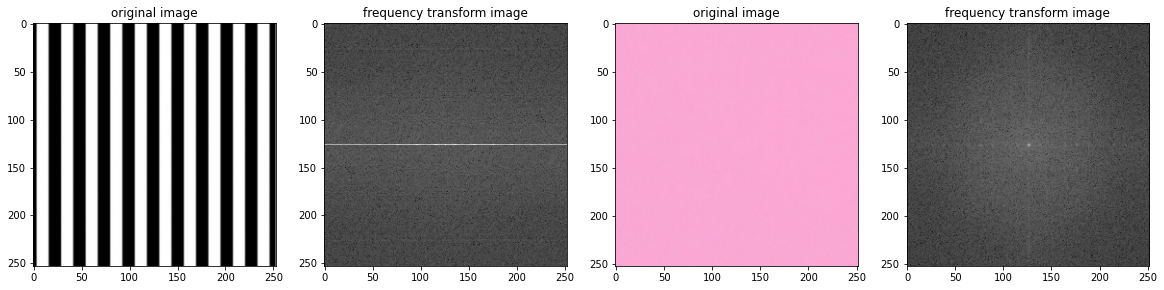

In [ ]:
# Esta función lleva a cabo la Transformada de Fourier y crea una nueva versión 
# de la imagen, que estara escalada y se encuentrara en el dominio de la frecuencia
def ft_image(norm_image):
    '''Esta función espera una imagen normalizada en escala de grises'''
    f = np.fft.fft2(norm_image)
    # Mover el centro hacia la mitad de la imagen. Usualmente, este centro 
    # se ubica en la esquina superior izquierda (Puedes visualizar los resultados
    # intermedios para ver la ubicación del centro.)
    fshift = np.fft.fftshift(f)
    # Escalar los valores de magnitud
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum

# Llamar a la función ft_images para aplicarla a las imagenes abiertas en el paso 1 
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# Mostrar las imagenes originales y las magnitudes del espectro
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')

Como se puede ver, las bajas frecuencias están en el centro de la magnitud del espectro (Imágenes en escala de grises con el título "frecuency transform image").

La magnitud del espectro de la imagen sólida tiene principalmente componentes de baja frecuencia (como se ve en el punto brillante central).

La magnitud del espectro de la imagen a rayas contiene frecuencias bajas para las áreas de color blanco y negro y frecuencias altas para los bordes entre estas tonalidades. La magnitud del espectro de la imagen con rayas también nos dice que hay una dirección dominante para estas frecuencias; las rayas verticales están representadas por una línea horizontal que pasa por el centro de la imagen de magnitud del espectro.

## 1.4 Transformada de Fourier para una imagen del mundo real

Text(0.5, 1.0, 'Magnitude spectrum')

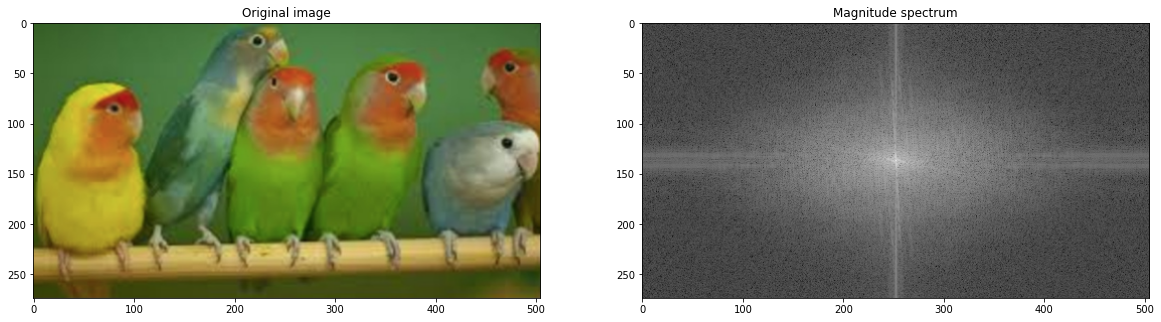

In [ ]:
# Abrir una imagen
image = cv2.imread('birds.png')
# Cambiar de BGR a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Normalizar la imagen
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Mostrar la imagen
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax1.set_title('Original image')
ax2.imshow(f_image, cmap='gray')
ax2.set_title('Magnitude spectrum')

Se puede observar que esta imagen tiene componentes de todas las frecuencias. Además, se puede ver un punto brillante en el centro de la imagen transformada, lo que nos indica que una gran parte de la imagen es de baja frecuencia; esto tiene sentido ya que el cuerpo de las aves y el fondo son de colores sólidos. La imagen transformada también nos dice que hay **dos** direcciones dominantes para estas frecuencias; los bordes verticales (los bordes de las aves) están representados por una línea horizontal que pasa por el centro de la imagen transformada de frecuencia, y los bordes horizontales (los bordes de la rama y la parte superior de las cabezas de las aves) están representados por una línea vertical que pasa por el centro.

## 1.5 Modificar y restaurar una imagen desde el dominio de la frecuencia

Dado que ya tenemos un par de imágenes en el dominio de la frecuencia, podemos realizar algunas operaciones como filtrado de paso alto o paso bajo. Luego, podemos implementar la transformada de fourier inversa para reconstruir la imagen y visualizar los resultados.

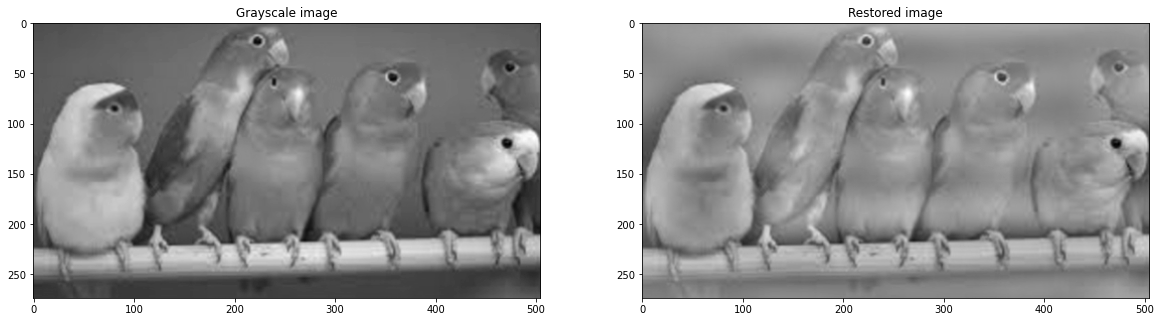

In [ ]:
# Aplicar TF a la imagen
f = np.fft.fft2(norm_image)
# Mover el centro de la magnituud del espectro hacia el medio
fshift_mask = np.fft.fftshift(f)

rows, cols = norm_image.shape
# Encontrar el centro 
crow, ccol = rows//2 , cols//2

# Eliminar los componentes de baja frecuencia de una imagen (posicionados en el centro)
fshift_mask[crow-4:crow+5, ccol-4:ccol+5] = 0

# Aplicar la inversa a fftshift, la cual lleva el centro hacia la izquierda superior de la imagen
f_ishift = np.fft.ifftshift(fshift_mask)
# ifft2 convierte la imagen del dominio de la frecuencia al dominio espacial
img_back = np.fft.ifft2(f_ishift)
# Selecciona el componente real 
img_back = np.real(img_back)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Grayscale image')
ax2.imshow(img_back, cmap='gray')
ax2.set_title('Restored image')

plt.show()

## **Ejercicio 1:** Elimine el ruido
Abra una imagen y aplique ruido con la librería Sckit-image. Puede ver un ejemplo de este procedimiento en el último laboratorio. Después, debera implementar la Transformada de Fourier. Luego, elimine los componentes de alta frecuencia (ruido) y restaure la imagen.

## 1.6 Filtros de paso alto y bajo usando la Transformada de Fourier

¡Recordemos a los filtros de paso alto y paso bajo! Probablemente te hayas preguntado qué hace que los filtros sean de paso alto y paso bajo; ¿Por qué un filtro Sobel es de paso alto y un filtro de Gauss es de paso bajo?

Bueno, en realidad puedes visualizar las frecuencias que estos filtros bloquean aplicando TF. La magnitud del espectro de cualquier imagen se pueden mostrar después de hacer una Transformada de Fourier (TF). Una TF observa los componentes de una imagen (bordes que son de alta frecuencia y áreas de color suave como de baja frecuencia) y traza las frecuencias que ocurren como puntos en el espectro. En consecuencia, TF nos permitira tratar a nuestros filtros como imágenes pequeñas y mostrarlas en el dominio de la frecuencia.

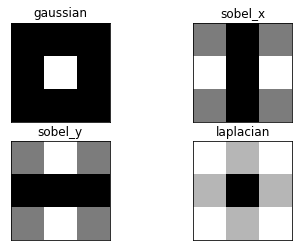

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Definir los filtros (gaussiano, sobel, y laplaciano)

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian (filtro de bordes)
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# Aplicar la Transformada  de Fourier a cada filtro
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# Mostrar la magnitud del espectro de los cuatro filtros
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

¡Las áreas de blanco o gris claro, permiten que pase esa parte del espectro de frecuencia! Las áreas negras significan que parte del espectro estara bloqueada en la imagen.

Recuerda que las frecuencias bajas en el espectro de frecuencia están en el centro de la imagen de transformada de frecuencia y las frecuencias altas están en los bordes. Por ende, podemos entender que el filtro gaussiano solo permite el paso de frecuencias de paso bajo, que es el centro de la imagen transformada en el dominio de la frecuencia. Los filtros sobel bloquean las frecuencias de una cierta orientación y un filtro laplace (bloqueara todo borde, independientemente de la orientación), así que debería bloquear las frecuencias bajas.

## **Ejercicio 2:** Transformada de Fourier con OpenCV
OpenCV tiene las funciones cv2.dft() y cv2.idft(), que nos permiten obtener el mismo resultado que con las funciones de NumPy que utilizamos en este laboratorio. Sin embargo, OpenCV nos proporciona dos canales:

* El primer canal representa la parte real del resultado.
* El segundo canal es para la parte imaginaria del resultado.

Investiga esta implementación de FFT y compara los resultados con los resultados de Numpy.

# 2. Transformada Hough

Ahora que has visto la Transformada de Fourier para imágenes, avancemos un paso más. ¡Es hora de extraer información de los bordes!

El segundo método que exploraremos es la Transformada Hough, la cual transforma los datos de una imagen al espacio Hough, donde uno puede identificar fácilmente estructuras simples como líneas y círculos.

## 2.1 Abrir una imagen y aplicar Canny Edge Detection

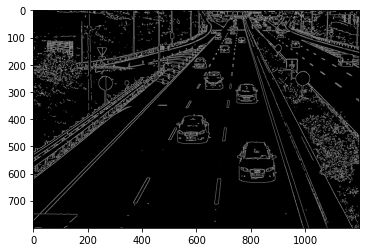

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

# Abrir una imagen
image = cv2.cvtColor(cv2.imread('road2.png'), cv2.COLOR_BGR2RGB) 
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Definir los parametros para el detector Canny 
low_threshold = 200
high_threshold = 250
# Aplicar Canny Edge Detection
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

## 2.2 Encontrar líneas con la Transformada Hough

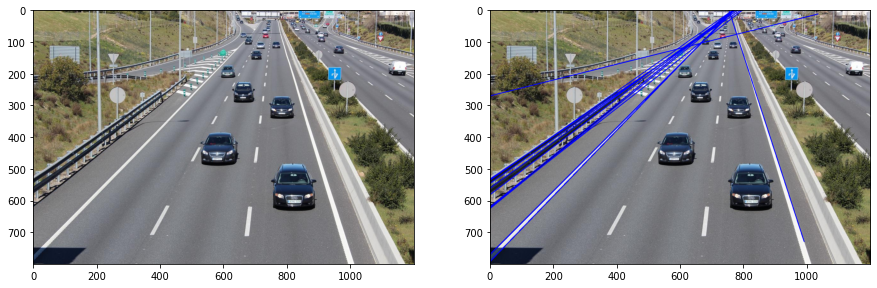

In [ ]:
#@title Transformada de Hough para líneas.
# Definimos los parámetros para la transformada de Hough.
rho = 1 #@param {type:"number"} # Tamaño de cada celda en el eje rho.
theta = np.pi/180 #@param {type:"string"} # Tamaño de cada célula en el eje theta.
threshold = 300 #@param {type:"number"} # Valor mínimo para considerar una celda del acumulador como una línea.
line_size = 1000 #@param {type:"number"}

# Genera una copia del mismo tamaño que nuestra imagen para dibujar sobre ella.
line_image = np.copy(image) # Crea una copia de la imagen para dibujar líneas en ella.

# Ejecuta la transformada Hough en la imagen.
lines = cv2.HoughLines(edges, rho, theta, threshold)

# Itera sobre las "líneas" de salida y dibuja líneas en la copia de la imagen,
# lo que requiere devolver los valores del espacio de Hough al espacio de la imagen.
if lines is not None:
  for line in lines:
    # Recupera las coordenadas rho y theta de la línea encontrada por HoughLines().
    rho,theta = line[0]

    # Convierte coordenadas polares en coordenadas rectangulares.
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho

    # Redondea los valores.
    x1 = int(x0 + line_size*(-b))
    y1 = int(y0 + line_size*(a))
    x2 = int(x0 - line_size*(-b))
    y2 = int(y0 - line_size*(a))

    # cv2.line() dibuja una línea en line_image desde el punto(x1,y1) hasta (x2,y2). 
    # (0,0,255) resalta el color de la línea y 2 el grosor.
    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,25)) 
ax1.imshow(image)
ax2.imshow(line_image)


## **Ejercicio 3:** Transformada Hough probabilística

Además de la función cv2.HoughLines(), la librería OpenCV tiene la implementación de la Transformada Hough probabilística. Para este ejercicio, deberas implementar la transformada Hough probabilística con una imagen similar a la anterior y a continuación, deberas describir las similitudes y diferencias entre ambos métodos. ¿Cuáles son las ventajas de utilizar la Transformada de Hough probabilística? 

## **Ejercicio 4:** Encuentra el trozo de papel

Hoy en día, muchos de nosotros hemos sustituido los típicos escáneres por nuestros celulares. Por ejemplo, CamScanner, entre otras aplicaciones, nos permiten escanear una página utilizando la cámara de nuestro celular con mucha facilidad. Para este ejercicio, necesitarás encontrar los bordes de un papel y segmentar la sección interior. Tu programa debería aceptar una imagen y devolver el trozo de papel segmentado con un fondo oscuro, o incluso mejor, devolver solo el trozo de papel.  

# Contribución

Puedes usar esta sección en el caso de que las contribuciones en tu equipo hayan sido variadas. Si ese es el caso, deberas anotar los nombres de tu equipo y su contribución. 

Ejemplo: 
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)

Deberá sumar 100% entre todas las contribuciones. Puedes borrar esta sección si todos los miembros de equipo contribuyeron por igual.  